In [1]:
from haloflow.npe import valid as V
from haloflow.npe import plotting as P
from haloflow import config as C

In [2]:
dat_dir = C.get_dat_dir()
data_dir = dat_dir + 'hf2/npe/'

In [3]:
train_sim = test_sim = 'Eagle100'
obs = 'mags'

In [4]:
all_sims = ['TNG50', 'TNG100', 'Eagle100', 'Simba100']
rem_sims = '_'.join([s for s in all_sims if s != 'Simba100'])
MODEL_NAME = f'dann_model_to_Simba100_{obs}'
fp = dat_dir + f'hf2/dann/models/{MODEL_NAME}.pt'

In [26]:
# only NPEs

# same NPE trained and tested
ranks, alpha, ecp, y_nde = V.validate_npe(train_obs=obs, train_sim=train_sim, test_obs=obs, test_sim=test_sim, version=1, data_dir=data_dir, n_samples=1000)

# NPE trained on train sim but tested with the same validation set as the DANN (in this case Simba100)
ranks_eagle, alpha_eagle, ecp_eagle, y_nde_eagle = V.validate_npe(train_obs=obs, train_sim=train_sim, test_obs=obs, test_sim='Simba100', version=1, data_dir=data_dir, n_samples=1000)

757 models trained
[538, 312, 163, 496, 746]
757 models trained
[538, 312, 163, 496, 746]


In [42]:
# NPEs + DANN (validated with Simba100)

# same train and test set but preds from DANN
ranks_dann, alpha_dann, ecp_dann, y_nde_dann = V.validate_npe(train_obs=obs, 
                                                              train_sim=train_sim, 
                                                              test_obs=obs, 
                                                              test_sim=test_sim, 
                                                              version=1, 
                                                              with_dann=True, 
                                                              data_dir=data_dir, 
                                                              n_samples=1000, 
                                                              fp=fp)

22 models trained
[0, 4, 2, 3, 13]


In [55]:
# train set but test set would be with Simba100 data from DANN
ranks_dann2, alpha_dann2, ecp_dann2, y_nde_dann2 = V.validate_npe(train_obs=obs, 
                                                              train_sim=train_sim, 
                                                              test_obs=obs, 
                                                              test_sim='Simba100', 
                                                              version=1, 
                                                              with_dann=True, 
                                                              data_dir=data_dir, 
                                                              n_samples=1000, 
                                                              fp=fp)

22 models trained
[0, 4, 2, 3, 13]


Text(0.05, 0.95, '$\\rm{M}_{\\rm h}$')

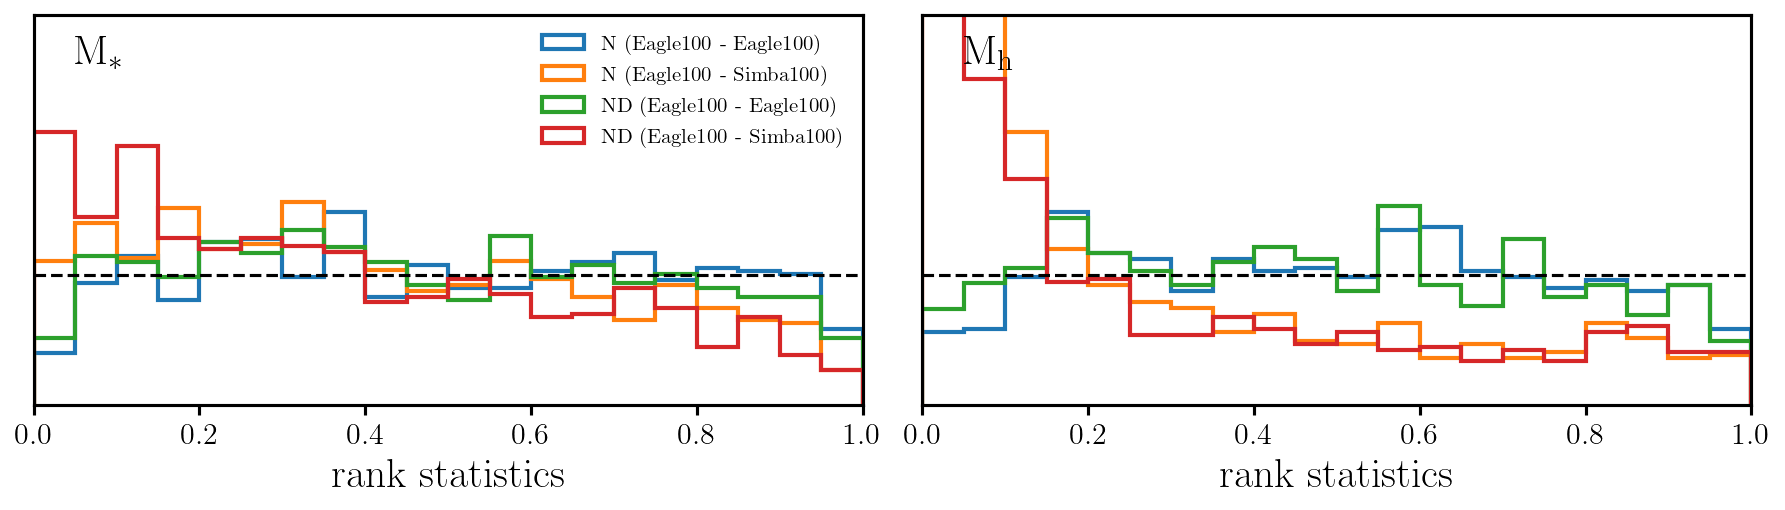

In [56]:
fig = P.plot_rank_statistics([ranks, ranks_eagle, ranks_dann, ranks_dann2], 
                             labels=[f'N ({train_sim} - {test_sim})', f'N ({train_sim} - Simba100)', f'ND ({train_sim} - {test_sim})', f'ND ({train_sim} - Simba100)'],)

# add text to the axes
fig.axes[0].text(0.05, 0.95, r'$\rm{M}_{*}$', fontsize=20, transform=fig.axes[0].transAxes, ha='left', va='top')
fig.axes[1].text(0.05, 0.95, r'$\rm{M}_{\rm h}$', fontsize=20, transform=fig.axes[1].transAxes, ha='left', va='top')

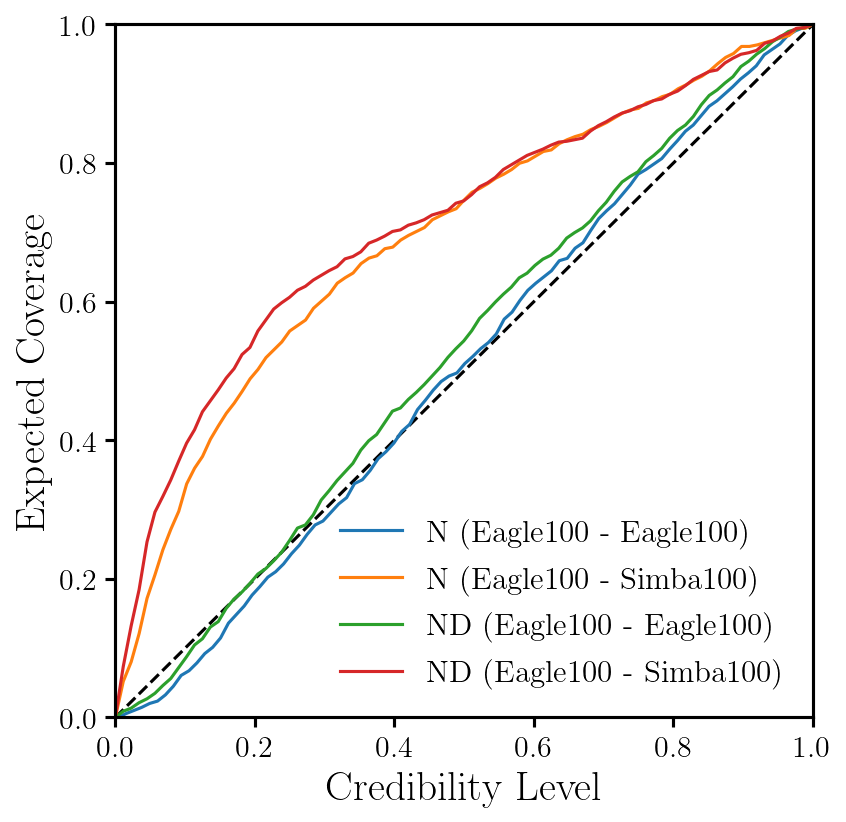

In [57]:
fig, ax = P.plot_coverage([alpha, alpha_eagle, alpha_dann, alpha_dann2], 
                          [ecp, ecp_eagle, ecp_dann, ecp_dann2], 
                          labels=[f'N ({train_sim} - {test_sim})', f'N ({train_sim} - Simba100)', f'ND ({train_sim} - {test_sim})', f'ND ({train_sim} - Simba100)'],)

757 models trained
[538, 312, 163, 496, 746]
22 models trained
[0, 4, 2, 3, 13]


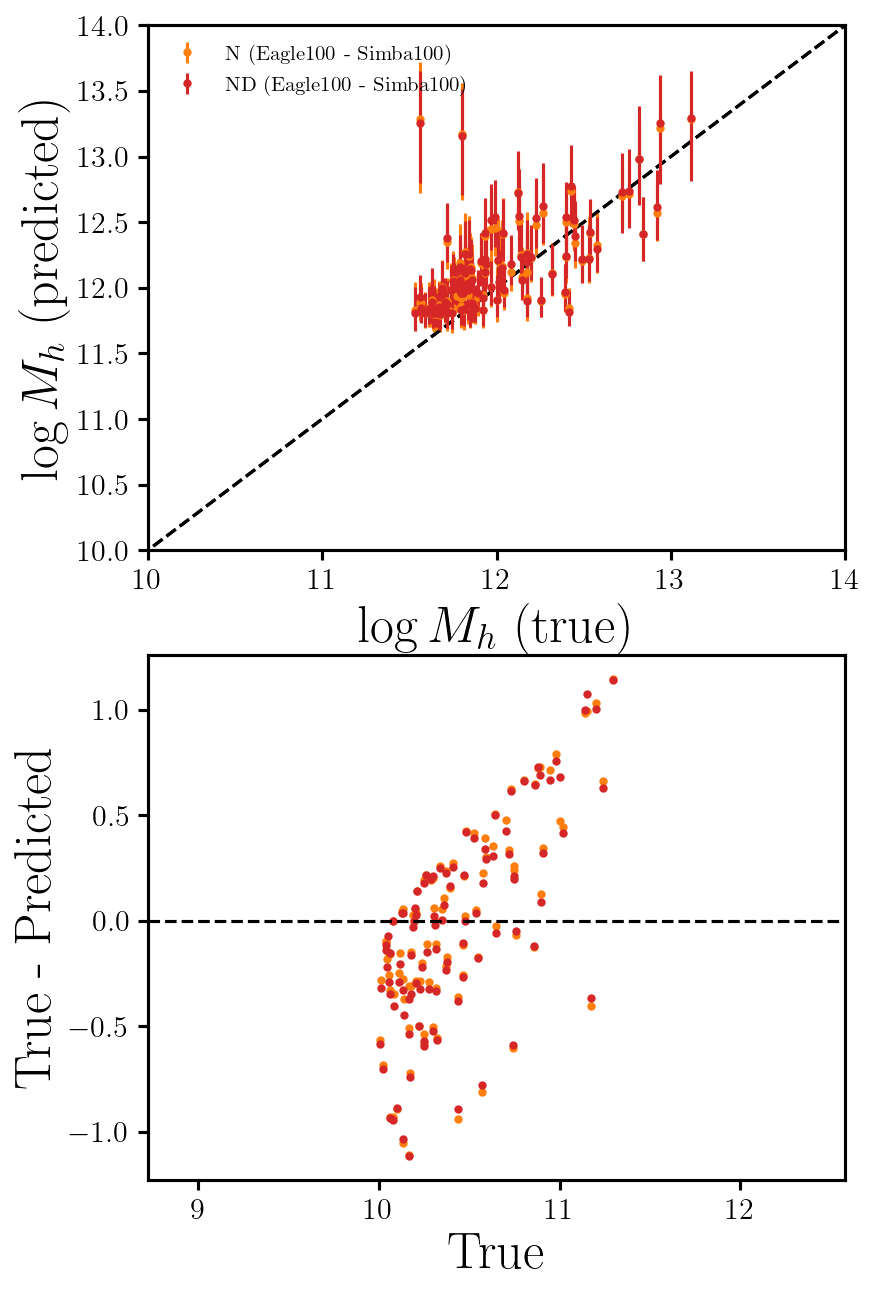

In [47]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(6, 10), dpi=150)

# ax[0], y_true, y_pred = P.plot_true_pred(
#     ax[0],
#     train_obs=obs,
#     train_sim=train_sim,
#     test_obs=obs,
#     test_sim=test_sim,
#     device='cpu',
#     mass='halo',
#     with_dann=False,
#     data_dir=data_dir
# )

ax[0], y_true_eg, y_pred_eg = P.plot_true_pred(
    ax[0],
    train_obs=obs,
    train_sim=train_sim,
    test_obs=obs,
    test_sim='Simba100',
    device='cpu',
    mass='halo',
    with_dann=False,
    data_dir=data_dir,
    fmt='.C1'
)

# ax[0], y_true_dann, y_pred_dann = P.plot_true_pred(
#     ax[0],
#     train_obs=obs,
#     train_sim=train_sim,
#     test_obs=obs,
#     test_sim=test_sim,
#     device='cpu',
#     mass='halo',
#     with_dann=True,
#     data_dir=data_dir,
#     fp=fp,
#     fmt='.C2'
# )

ax[0], y_true_dann_simba, y_pred_dann_simba = P.plot_true_pred(
    ax[0],
    train_obs=obs,
    train_sim=train_sim,
    test_obs=obs,
    test_sim='Simba100',
    device='cpu',
    mass='halo',
    with_dann=True,
    data_dir=data_dir,
    fp=fp,
    fmt='.C3'
)

# y_nde_q0, y_nde_q1, y_nde_q2 = np.quantile(y_pred, (0.16, 0.5, 0.84), axis=1)
y_nde_eg_q0, y_nde_eg_q1, y_nde_eg_q2 = np.quantile(y_pred_eg, (0.16, 0.5, 0.84), axis=1)
# y_nde_dann_q0, y_nde_dann_q1, y_nde_dann_q2 = np.quantile(y_pred_dann, (0.16, 0.5, 0.84), axis=1)
y_nde_dann_simba_q0, y_nde_dann_simba_q1, y_nde_dann_simba_q2 = np.quantile(y_pred_dann_simba, (0.16, 0.5, 0.84), axis=1)

# ax[0].legend([f'N ({train_sim} - {test_sim})', f'N ({train_sim} - Simba100)', f'ND ({train_sim} - {test_sim})', f'ND ({train_sim} - Simba100)'])
ax[0].legend([f'N ({train_sim} - Simba100)', f'ND ({train_sim} - Simba100)'])

# ax[1].plot(y_true[:, 0], y_true[:, 0] - y_nde_q1[:, 0], '.C0', label='')
ax[1].plot(y_true[:, 0], y_true[:, 0] - y_nde_eg_q1[:, 0], '.C1', label='')
# ax[1].plot(y_true[:, 0], y_true[:, 0] - y_nde_dann_q1[:, 0], '.C2', label='')
ax[1].plot(y_true[:, 0], y_true[:, 0] - y_nde_dann_simba_q1[:, 0], '.C3', label='')

# dashed lines at 0
ax[1].axhline(0, color='black', linestyle='--')
ax[1].set_xlabel('True', fontsize=25)
ax[1].set_ylabel('True - Predicted', fontsize=25)

plt.show()

In [3]:
import torch
from haloflow.dann import get_preds
from haloflow import data as D

# Load test data
mass_range_sm = [10.0, 13.]
mass_range_hm = [11.5, 15.]

with_dann = True
train_samples = None
device = 'cpu'
fp = None
test_obs = 'mags'


sims = ['Eagle100', 'TNG50', 'TNG100', 'Simba100']

for train_sim in sims:
    Y_test, X_test = D.hf2_centrals('test', test_obs, sim=train_sim, version=1)

    mask_sm = (Y_test[:, 0] > mass_range_sm[0]) & (Y_test[:, 0] < mass_range_sm[1])
    mask_hm = (Y_test[:, 1] > mass_range_hm[0]) & (Y_test[:, 1] < mass_range_hm[1])
    Y_test = Y_test[mask_sm & mask_hm]
    X_test = X_test[mask_sm & mask_hm]


    if with_dann:
        if fp is None:
            import glob
            all_sims = ['TNG50', 'TNG100', 'Eagle100', 'Simba100']
            rem_sims = '_'.join([s for s in all_sims if s != 'Simba100'])
            fp = '/Users/nikhilgaruda/Documents/Astronomy_Research/haloflow/data/hf2/dann/models/dann_model_TNG50_TNG100_Eagle100_to_Simba100_mags_lr0.001_bs32_e100_2025-03-08.pt'
            fp = glob.glob(fp)[0]
            print(fp)

        label_pred, _ = get_preds.get_dann_preds(fp, test_obs, train_sim)
        # already masked out from the dataloaders...
        X_test = label_pred.detach().numpy()
    

    # Select subset if needed
    if train_samples is not None:
        np.random.seed(42)
        idx = np.random.choice(len(Y_test), train_samples, replace=False)
        Y_test = Y_test[idx]
        X_test = X_test[idx]

    # Convert test data to tensors once (on GPU if available)
    Y_test_torch = torch.tensor(Y_test, dtype=torch.float32, device=device)
    print(Y_test_torch[:, 1].min())
    X_test_torch = torch.tensor(X_test, dtype=torch.float32, device=device)

    fig, ax = plt.subplots(1, 2, dpi=150, figsize=(10, 8))

    ax[0].scatter(Y_test_torch[:, 0], X_test_torch[:, 0], label='Stellar', s=3)
    ax[0].plot([10, 13], [10, 13], 'k--')
    ax[1].scatter(Y_test_torch[:, 1], X_test_torch[:, 1], label='Halo', s=3)
    ax[1].plot([11.5, 15], [11.5, 15], 'k--')

    ax[0].set_xlim(10, 11)
    ax[0].set_ylim(10, 11)
    ax[1].set_xlim(11.5, 15)
    ax[1].set_ylim(11.5, 15)


    ax[0].set_xlabel('True from dataset', fontsize='x-large')
    ax[0].set_ylabel('DANN Prediction', fontsize='x-large')
    ax[0].text(0.05, 0.95, 'M_*', transform=ax[0].transAxes, fontsize='x-large', verticalalignment='top')
    ax[1].text(0.05, 0.95, 'M_h', transform=ax[1].transAxes, fontsize='x-large', verticalalignment='top')

    plt.suptitle(f'{train_sim}', fontsize='x-large')
    plt.tight_layout()
    plt.show()
    
    # mse
    mse = torch.mean((Y_test_torch - X_test_torch)**2)
    print(f'MSE: {mse.item()}')
    break

/Users/nikhilgaruda/Documents/Astronomy_Research/haloflow/data/hf2/dann/models/dann_model_TNG50_TNG100_Eagle100_to_Simba100_mags_lr0.001_bs32_e100_2025-03-08.pt


RuntimeError: Error(s) in loading state_dict for DANN:
	Missing key(s) in state_dict: "feature_extractor.layers.2.weight", "feature_extractor.layers.2.bias", "feature_extractor.layers.2.running_mean", "feature_extractor.layers.2.running_var", "feature_extractor.layers.4.weight", "feature_extractor.layers.4.bias", "feature_extractor.layers.5.weight", "feature_extractor.layers.5.bias", "feature_extractor.layers.5.running_mean", "feature_extractor.layers.5.running_var", "label_predictor.layers.1.weight", "label_predictor.layers.1.bias", "label_predictor.layers.1.running_mean", "label_predictor.layers.1.running_var", "label_predictor.layers.4.weight", "label_predictor.layers.4.bias", "label_predictor.layers.5.weight", "label_predictor.layers.5.bias", "label_predictor.layers.5.running_mean", "label_predictor.layers.5.running_var". 
	Unexpected key(s) in state_dict: "feature_extractor.layers.3.weight", "feature_extractor.layers.3.bias", "label_predictor.layers.2.weight", "label_predictor.layers.2.bias". 

In [15]:
# calculate the mean and standard deviation of the residuals
residuals = y_true[:, 1] - y_nde_q1[:, 1]
residuals_dann = y_true[:, 1] - y_nde_dann_q1[:, 1]
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
mean_residuals_dann = np.mean(residuals_dann)
std_residuals_dann = np.std(residuals_dann)
print(f'only NPE: mean = {mean_residuals:.2f}, std = {std_residuals:.2f}')
print(f'NPE + DANN: mean = {mean_residuals_dann:.2f}, std = {std_residuals_dann:.2f}')

print(f'Difference in mean: {mean_residuals - mean_residuals_dann:.2f}')
print(f'Difference in std: {std_residuals - std_residuals_dann:.2f}')


only NPE: mean = 0.02, std = 0.21
NPE + DANN: mean = 0.02, std = 0.21
Difference in mean: -0.00
Difference in std: -0.01
